# Wrangle and Analyze Data from WeRateDogs Twitter Archive & API

In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Gather

In [2]:
with open("tweet_json.txt", 'r') as datafile:
    tweets_original = pd.read_json('tweet_json.txt', lines=True)

In [3]:
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image_predictions.tsv', mode='wb') as file:
        file.write(r.content)
image_predictions_og = pd.read_csv('image_predictions.tsv', delimiter='\t')

In [4]:
twitter_archive_og = pd.read_csv('twitter-archive-enhanced.csv')

# Assess

### Data from *tweet_json.txt*

In [5]:
tweets_original.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",37162,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,7949,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",31963,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,5903,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",24069,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,3903,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",40485,False,This is Darla. She commenced a snooze mid meal...,NaN,...,NaN,NaN,NaN,NaN,8103,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",38709,False,This is Franklin. He would like you to stop ca...,NaN,...,NaN,NaN,NaN,NaN,8786,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [6]:
tweets_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2333 non-null datetime64[ns]
display_text_range               2333 non-null object
entities                         2333 non-null object
extended_entities                2061 non-null object
favorite_count                   2333 non-null int64
favorited                        2333 non-null bool
full_text                        2333 non-null object
geo                              0 non-null float64
id                               2333 non-null int64
id_str                           2333 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

In [7]:
tweets_original['full_text'].duplicated().sum()

0

**tweets** 
- Tidiness issues:
  1. Columns with no or little data: **contributor**, **coordinates**, **geo**, **place**
  2. *retweet_count*, *favorite_count*, *created_at*, *lang* are a table separate from **twitter_archive**
- Quality issues:
  1. *id* is not named the same as *tweet_id* in **twitter_archive** and **image_predictions** - Done
  2. *id* is int64 - Done
- Cleaning tasks:
  1. Rename *id* to *tweet_id*
  2. Convert *id* to object type
  3. Create a new dataframe containing columns *tweet_id, retweet_count, favorite_count, created_at, lang* to merge with the master dataframe

### Data from *image_predictions.tsv*

In [8]:
image_predictions_og.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [9]:
image_predictions_og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [10]:
image_predictions_og['tweet_id'].duplicated().sum()

0

**image_predictions**
- Quality issue:
  1. *tweet_id* is int64, not string
- Cleaning tasks:
  1. Convert *tweet_id* into object type
  2. Merge *image_predictions* with data from twitter-archive-enhanced.csv to remove tweets with no image prediction data

### Data from *twitter-archive-enhanced.csv*

In [11]:
twitter_archive_og.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [12]:
twitter_archive_og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
twitter_archive_og.name.value_counts().index.tolist()

['None',
 'a',
 'Charlie',
 'Cooper',
 'Oliver',
 'Lucy',
 'Penny',
 'Tucker',
 'Lola',
 'Winston',
 'Bo',
 'Sadie',
 'the',
 'Buddy',
 'Toby',
 'an',
 'Daisy',
 'Bailey',
 'Leo',
 'Milo',
 'Bella',
 'Dave',
 'Stanley',
 'Jack',
 'Scout',
 'Koda',
 'Rusty',
 'Oscar',
 'Jax',
 'Larry',
 'Chester',
 'Louis',
 'George',
 'Sunny',
 'Oakley',
 'Bentley',
 'very',
 'Alfie',
 'Finn',
 'Phil',
 'Sammy',
 'Gus',
 'Maddie',
 'Ruby',
 'Gerald',
 'Archie',
 'Jerry',
 'Jeffrey',
 'Winnie',
 'Beau',
 'Shadow',
 'Cassie',
 'Chip',
 'Sampson',
 'Reginald',
 'Bruce',
 'one',
 'Gary',
 'Hank',
 'Clarence',
 'quite',
 'Maggie',
 'Maximus',
 'Riley',
 'Carl',
 'Loki',
 'Duke',
 'Dexter',
 'Clark',
 'Bear',
 'Moose',
 'Sophie',
 'Scooter',
 'Brody',
 'Derek',
 'just',
 'Reggie',
 'Boomer',
 'Luna',
 'Walter',
 'Earl',
 'Otis',
 'Calvin',
 'Waffles',
 'Zoey',
 'Vincent',
 'Coco',
 'Klevin',
 'Kyle',
 'Olive',
 'Sebastian',
 'Wallace',
 'Lorenzo',
 'Steven',
 'Nala',
 'Jimothy',
 'Rory',
 'Lily',
 'Reese',
 

By visually inspecting this list of values for *name*, a list of invalid names is created, which includes "a", "the", "an", "old", "his", "by", "this", "O", "all", "space", "unacceptable", "such", "my", "quite", "very", "one", "just", "mad", "getting", "not", "actually", "infuriating", "life", "light", "officially", "None".

In [14]:
twitter_archive_og.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [15]:
twitter_archive_og.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [16]:
pd.set_option('display.max_colwidth', 1000)
twitter_archive_og[twitter_archive_og.rating_denominator != 10][['text', 'rating_numerator', 'rating_denominator']]


,text,rating_numerator,rating_denominator
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,@docmisterio account started on 11/15/15,11,15
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50


In [17]:
twitter_archive_og.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [18]:
twitter_archive_og.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [19]:
twitter_archive_og.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

**twitter_archive** 

- Tidiness issue:
  1. *doggo*, *pupper*, *puppo* are separate columns.
  2. Retweets and retweet-related columns should be removed from the dataframe.
  3. Tweets beyond August 1, 2017 should be removed as there's no data for image predictions.
  4. *retweeted_status_id*, *retweeted_status_user_id*, *retweeted_status_timestamp* are not needed in the master dataframe since all retweets will be removed.
- Quality issue:
  1. *tweet_id* is not string.
  2. Names in *name* columns are not actual names e.g. "a", "the", "an", "old", "his", "by", "this", "O", "all", "space", "unacceptable", "such", "my", "quite", "very", "one", "just", "mad", "getting", "not", "actually", "infuriating", "life", "light", "officially", "None".
  3. *in_reply_to_status_id* is float64. This column is contains id's of statuses each tweet is in reply to, so they are nominal data and should be strings.
  4. *in_reply_to_user_id* is float64, not string. This column also contains id's and should be converted to object type.
  5. *timestamp* is string.
  6. rating_numerator and rating_denominator on lines 313, 342, 784, 1068, 1165, 1202, 1662, 2335 are not extracted correctly. 
  7. *doggo, pupper, puppo* has the string 'None' as a value instead of NaN. 'None' should be replaced with np.nan to facilitate the merging of these three columns into one single column containing values about which stage a dog is in.
  8. *floofer* has two string values 'floofer' and 'None' instead of True and False. *floofer* is a characteristic of a dog so its value should be binary i.e boolean. 
- Cleaning tasks:
  1. Convert *tweet_id* into object tyep
  2. Replace invalid names in *name* column with np.nan
  3. Convert *in_reply_to_user_id* and *in_reply_to_status_id* to object type
  4. Convert *timestamp* to datetime type
  5. Replace incorrectly extracted rating numerator and denominator for lines 313, 342, 784, 1068, 1165, 1202, 1662, 2335
  6. Merge *doggo, pupper, puppo* into one single column. If an entry has two or more stages, manual inspection i.e. reading tweet's full text and viewing tweet's image, shall be implemented to determine the correct stage. Multiple stages will be denoted with the values *doggo/pupper* or *doggo/puppo* or *pupper/puppo*.
  7. Replace the two values 'floofer' and 'None' in column *floofer* with 'True' and 'False'.

# Clean

### Dataframe *tweets*

In [20]:
#Make a copy of the original dataframe before cleaning
tweets = tweets_original.copy()

In [21]:
#Rename column 'id' to 'tweet_id'
tweets.rename(columns={'id':'tweet_id'}, inplace=True)

In [22]:
#Convert 'tweet_id' to string
tweets['tweet_id'] = tweets['tweet_id'].astype(str)

In [23]:
#'tweet_id' is converted to object type
tweets.tweet_id.dtype

dtype('O')

In [24]:
#Extract four columns into a new dataframe for merging with master dataframe
tweets_stats = tweets[['tweet_id', 'favorite_count', 'retweet_count', 'lang']].copy()

### Dataframe *image_predictions*

In [25]:
#Make a copy of the original dataframe before cleaning
image_predictions = image_predictions_og.copy()

In [26]:
#Convert 'tweet_id' column to string
image_predictions['tweet_id'] = image_predictions['tweet_id'].astype(str)
image_predictions['tweet_id'].dtype

dtype('O')

### Dataframe *twitter_archive*

In [27]:
#Make a copy of the original dataframe before cleaning
twitter_archive = twitter_archive_og.copy()

In [28]:
#Convert 'tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id' to string
columns_to_convert = ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id']
for i in columns_to_convert:
    twitter_archive[i] = twitter_archive[i].astype(str)

In [29]:
#Convert 'timestamp' from string to datetime
twitter_archive['timestamp'] = pd.to_datetime(twitter_archive['timestamp'])

In [30]:
#Remove retweets from dataframe twitter_archive
twitter_archive.drop(twitter_archive[twitter_archive['text'].str.contains('RT @')].index, axis=0, inplace=True)

In [31]:
#Reset index after dropping retweets
twitter_archive.reset_index(inplace=True, drop=True)

In [32]:
#All retweets are removed from the dataframe
twitter_archive[twitter_archive['text'].str.contains('RT @')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [33]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         2175 non-null object
in_reply_to_user_id           2175 non-null object
timestamp                     2175 non-null datetime64[ns, UTC]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns,

In [34]:
#Drop columns related to retweets
twitter_archive.drop(columns=['retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'], inplace=True)

In [35]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,nan,nan,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,nan,nan,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,nan,nan,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,nan,nan,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,nan,nan,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,nan,nan,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,nan,nan,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,nan,nan,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,nan,nan,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,890240255349198849,nan,nan,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying in

In [36]:
#Replace the string 'None' in columns 'doggo', 'pupper', 'puppo' with np.nan
twitter_archive.loc[:, 'doggo':'puppo'] = twitter_archive.loc[:, 'doggo':'puppo'].replace('None', np.nan)

In [37]:
twitter_archive.query("pupper == 'pupper' and doggo == 'doggo'")[['doggo', 'pupper', 'puppo']]

,doggo,pupper,puppo
382,doggo,pupper,NaN
442,doggo,pupper,NaN
467,doggo,pupper,NaN
474,doggo,pupper,NaN
567,doggo,pupper,NaN
593,doggo,pupper,NaN
722,doggo,pupper,NaN
781,doggo,pupper,NaN
885,doggo,pupper,NaN
935,doggo,pupper,NaN


In [38]:
twitter_archive.query("puppo == 'puppo' and doggo == 'doggo'")[['doggo', 'pupper', 'puppo']]

,doggo,pupper,puppo
165,doggo,NaN,puppo


Many rows have two stages simultaneously, due to the fact that there are more than one dog in the image. Therefore, when combining the three columns doggo, puppo and pupper for a tidier dataframe, the value of the resulting column will be a combination of the stages of the dogs i.e doggo/pupper and doggo/puppo.

In [39]:
#Combine doggo, pupper and puppo into into one single column named 'stage'
twitter_archive['stage'] = twitter_archive['doggo'].combine_first(twitter_archive['pupper']).combine_first(twitter_archive['puppo'])

The following cells will get the locations of rows containing more than one stage and replace the current value with the appropriate value determined by reading through the tweet's full text and/or examining images included in the tweets.

In [40]:
twitter_archive.columns.get_loc('stage')

14

In [41]:
twitter_archive.query("pupper == 'pupper' and doggo == 'doggo'").index

Int64Index([382, 442, 467, 474, 567, 593, 722, 781, 885, 935], dtype='int64')

In [42]:
twitter_archive.iloc[[382, 442, 467, 474, 567, 593, 722, 781, 885, 935], :]['text']

382    This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7
442                        Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho
467                                                                                                   Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze
474                        This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj
567    This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd
593                                                                                                              Pupper butt 1, Doggo 0. Bot

In [43]:
twitter_archive.query("pupper == 'pupper' and doggo == 'doggo'")[['doggo', 'pupper', 'puppo', 'stage']]

,doggo,pupper,puppo,stage
382,doggo,pupper,NaN,doggo
442,doggo,pupper,NaN,doggo
467,doggo,pupper,NaN,doggo
474,doggo,pupper,NaN,doggo
567,doggo,pupper,NaN,doggo
593,doggo,pupper,NaN,doggo
722,doggo,pupper,NaN,doggo
781,doggo,pupper,NaN,doggo
885,doggo,pupper,NaN,doggo
935,doggo,pupper,NaN,doggo


In [44]:
twitter_archive.query("puppo == 'puppo' and doggo == 'doggo'").index

Int64Index([165], dtype='int64')

In [45]:
twitter_archive.iloc[165, :]['text']

"Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel"

Based on the tweets' texts and images, a dictionary of which stage a dog belongs to is determined as below.

In [46]:
replace_values = {382: 'pupper', 442: 'doggo/pupper', 467: 'doggo/pupper', 474: 'pupper', 567: np.nan, 593: 'doggo/pupper', 
                  722: 'doggo/pupper', 781: 'doggo', 885: 'doggo/pupper', 935: 'doggo/pupper', 165: 'puppo'}

for key, value in replace_values.items():
    twitter_archive.iloc[key, 14] = value

Now all rows containing multiple stages will have only one value correctly reflecting its tweet's content

In [47]:
twitter_archive.query("pupper == 'pupper' and doggo == 'doggo'")[['doggo', 'pupper', 'puppo', 'stage']]

,doggo,pupper,puppo,stage
382,doggo,pupper,NaN,pupper
442,doggo,pupper,NaN,doggo/pupper
467,doggo,pupper,NaN,doggo/pupper
474,doggo,pupper,NaN,pupper
567,doggo,pupper,NaN,NaN
593,doggo,pupper,NaN,doggo/pupper
722,doggo,pupper,NaN,doggo/pupper
781,doggo,pupper,NaN,doggo
885,doggo,pupper,NaN,doggo/pupper
935,doggo,pupper,NaN,doggo/pupper


In [48]:
twitter_archive.query("puppo == 'puppo' and doggo == 'doggo'")[['doggo', 'pupper', 'puppo', 'stage']]

,doggo,pupper,puppo,stage
165,doggo,NaN,puppo,puppo


In [49]:
#Replace string values in 'floofer' column with boolean values
twitter_archive['floofer'] = twitter_archive['floofer'].replace([np.nan, 'floofer'], [False, True])
twitter_archive['floofer'].value_counts()

False    2165
True       10
Name: floofer, dtype: int64

In [50]:
#Merge three dataframes twitter_archive, image_predictions & tweets into one master dataframe
df = twitter_archive.merge(image_predictions.merge(tweets_stats, on='tweet_id'), on='tweet_id')

In [51]:
#Drop columns doggo, pupper, puppo to make the master dataframe tidier
df.drop(columns=['doggo', 'pupper', 'puppo'], inplace=True)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 26 columns):
tweet_id                 1987 non-null object
in_reply_to_status_id    1987 non-null object
in_reply_to_user_id      1987 non-null object
timestamp                1987 non-null datetime64[ns, UTC]
source                   1987 non-null object
text                     1987 non-null object
expanded_urls            1987 non-null object
rating_numerator         1987 non-null int64
rating_denominator       1987 non-null int64
name                     1987 non-null object
floofer                  1987 non-null bool
stage                    297 non-null object
jpg_url                  1987 non-null object
img_num                  1987 non-null int64
p1                       1987 non-null object
p1_conf                  1987 non-null float64
p1_dog                   1987 non-null bool
p2                       1987 non-null object
p2_conf                  1987 non-null float64
p2_dog      

The resulting master dataframe contains no null value for all columns save for *stage*. Data in the *stage* column was originally extracted algorithmically so missing data will be left as is. Quality issues with the columns *name, rating_numerator*, and *rating_denominator* are addressed after the master dataframe is created to avoid complications in indexing.

In [53]:
#Query for tweets with invalid names extracted to determine whether a valid name can be found
invalid_names = ["a", "the", "an", "old", "his", "by", "this", "O", "all", "space", "unacceptable", "such", "my", "quite", "very", "one", "just", "mad", "getting", "not", "actually", "infuriating", "life", "light", "officially", "incredibly", "None"]
df[df['name'].isin(invalid_names)]['text']

5          Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh
7                              When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq
12                                         Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm
21                                       I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba
23                                                           You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV
24                  This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would

Two tweets in line 125 and line 1983 contain valid names, which are 'Boomer' and 'Piers Morgan'.

In [54]:
#Replace invalid names with np.nan
invalid_names = ["a", "the", "an", "old", "his", "by", "this", "O", "all", "space", "unacceptable", "such", "my", "quite", "very", "one", "just", "mad", "getting", "not", "actually", "infuriating", "life", "light", "officially", "incredibly", "None"]
df['name'].replace(to_replace=invalid_names, value=np.nan, inplace=True)

In [55]:
df.columns.get_loc('name')

9

In [56]:
df.iloc[125, 9] = 'Boomer'
df.iloc[1983, 9] = 'Piers Morgan'

Line 125 and 1983 now have correct values in the *name* column.

In [57]:
df.iloc[1983, :]['name']

'Piers Morgan'

In [58]:
df.iloc[125, :]['name']

'Boomer'

In [59]:
#Query for entries with incorrect rating numerator and denominator to determine the correct values to replace
pd.set_option('display.max_colwidth', 1000)
df[df.rating_denominator != 10][['text', 'rating_numerator', 'rating_denominator']]


,text,rating_numerator,rating_denominator
319,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
381,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
657,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
794,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
842,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
885,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
919,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
940,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
964,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
982,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50


In [60]:
df.columns.get_loc('rating_numerator')

7

In [61]:
#Replace incorrect numerator with correct values
replace_numerator = {794: 14, 885: 13, 919: 11, 1322: 10, 1966: 9}
for key, value in replace_numerator.items():
    df.iloc[key, 7] = value

In [62]:
#Replace incorrect denominator with correct values
df.iloc[list(replace_numerator.keys()), 8] = 10

In [63]:
df[df.rating_denominator != 10][['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
319,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
381,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
657,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
842,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
940,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
964,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
982,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50
1048,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50
1124,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44,40
1296,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143,130


Further inspection of the rest of denominators other than 10 shows that they are often given to tweets with a flock of cuties. These ratings are valid and are perfectly aligned with the spirit of WeRateDog so will be kept. A new column named 'rating' will be generated to calculate the value of rating_numerator divided by rating_denominator with 2 decmal places, which will be used to gain more insights. 

Line 381 specifically does not have any rating, thus will be removed from the dataframe. 

In [64]:
#Drop row 381, which has no rating
df.drop([381], inplace=True)
df.reset_index(inplace=True, drop=True)

In [65]:
df.shape

(1986, 26)

In [66]:
#Create new column named 'rating'
df['rating'] = round(df['rating_numerator'] / df['rating_denominator'], 2)

In [67]:
#Write master dataframe to a csv file
df.to_csv('twitter_archive_master.csv')

# Visualizations & insights

In [68]:
breeds_order = df[df['p1_dog'] == True]['p1'].value_counts().index.tolist()[:20]

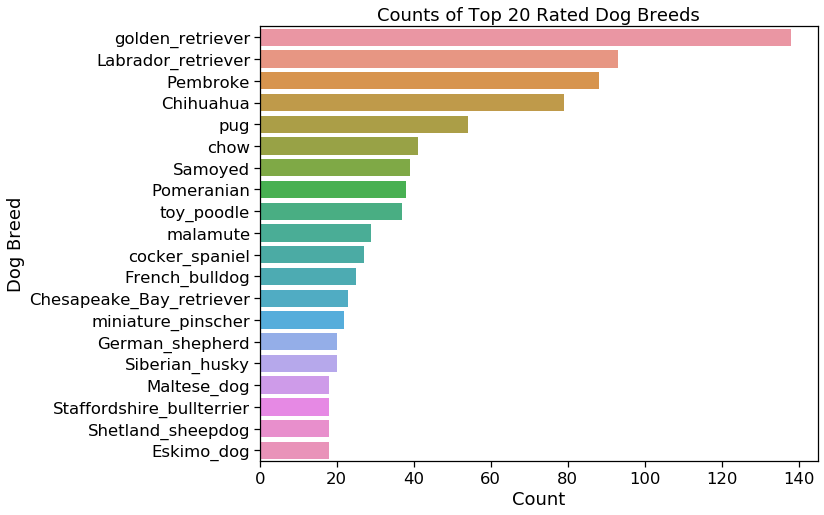

In [69]:
#Plot the counts of top 20 rated dog breeds
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
plt.figure(figsize=[10, 8])
sns.countplot(data=df, y='p1', order=breeds_order)
plt.xlabel('Count')
plt.ylabel('Dog Breed')
plt.title('Counts of Top 20 Rated Dog Breeds');

In [70]:
mask = (df.p1.isin(breeds_order))
dog_categories = pd.api.types.CategoricalDtype(categories=df[df['p1_dog'] == True]['p1'].value_counts().index.tolist())
df['p1']= df['p1'].astype(dog_categories)

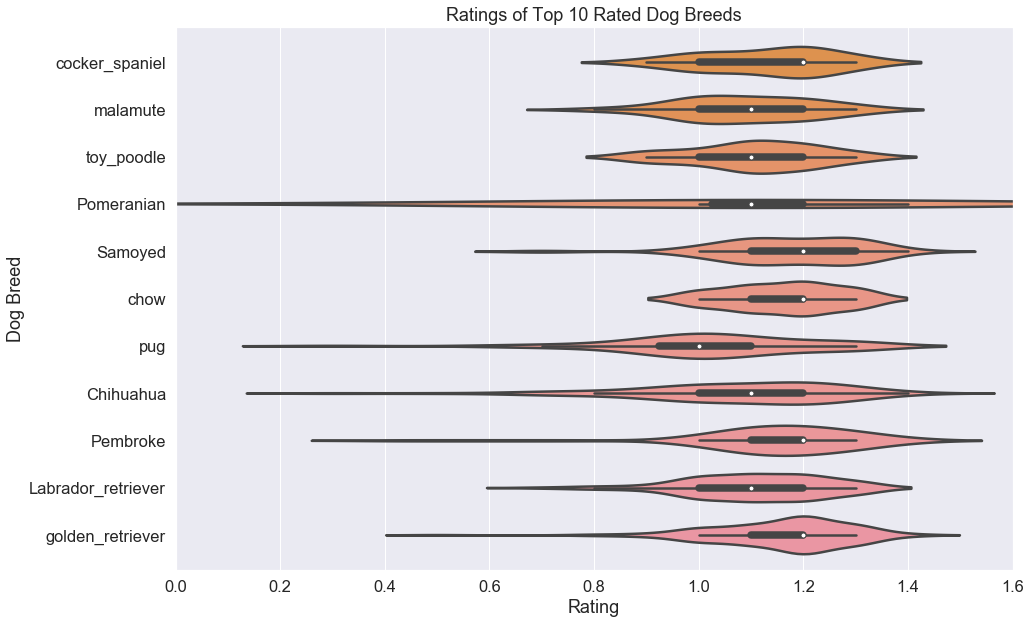

In [71]:
#Plot the distribution of rating values for top 20 rated dog breeds using violin plot
plt.figure(figsize=[15, 10])
sns.set_style('darkgrid')
sns.violinplot(data=df[mask], x='rating', y='p1')
plt.xlim(0, 1.6)
plt.ylim(-0.75, 10.75);
plt.xlabel('Rating')
plt.ylabel('Dog Breed')
plt.title('Ratings of Top 10 Rated Dog Breeds');

In [72]:
#Convert a portion of with timestamp and favorite_count to create a pivot table
fav_ct_dist = df[['timestamp','favorite_count']].copy()

In [73]:
fav_ct_dist.loc[:, 'day_tweeted'] = fav_ct_dist['timestamp'].apply(lambda x: x.weekday())
fav_ct_dist.loc[:, 'month_tweeted'] = fav_ct_dist['timestamp'].apply(lambda x: x.month)

In [74]:
day_month_pivot = pd.pivot_table(fav_ct_dist[['favorite_count', 'day_tweeted', 'month_tweeted']], index='day_tweeted', columns='month_tweeted', values='favorite_count', aggfunc=np.sum)

In [75]:
day_month_pivot

month_tweeted,1,2,3,4,5,6,7,8,9,10,11,12
day_tweeted,,,,,,,,,,,,
0,232018,212875,166069,218241,361225,278718,309953,103069,55338,209480,170695,322312
1,198734,290306,199641,137740,238339,215746,356539,188268,136751,126780,198351,288696
2,363675,238992,259013,143727,265406,278031,364551,71032,125315,87358,201783,360248
3,143277,199943,170857,145149,230008,361799,191691,66573,150531,141608,121322,244175
4,336788,280085,197853,177516,190705,218900,315813,80267,80438,79583,98679,293722
5,372284,137782,180895,192727,75421,429127,293409,65110,51902,69415,154170,199325
6,228619,194731,205110,126452,186580,216825,249750,71336,60860,95756,146765,359645


In [76]:
day_month_pivot.columns = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [77]:
day_month_pivot.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

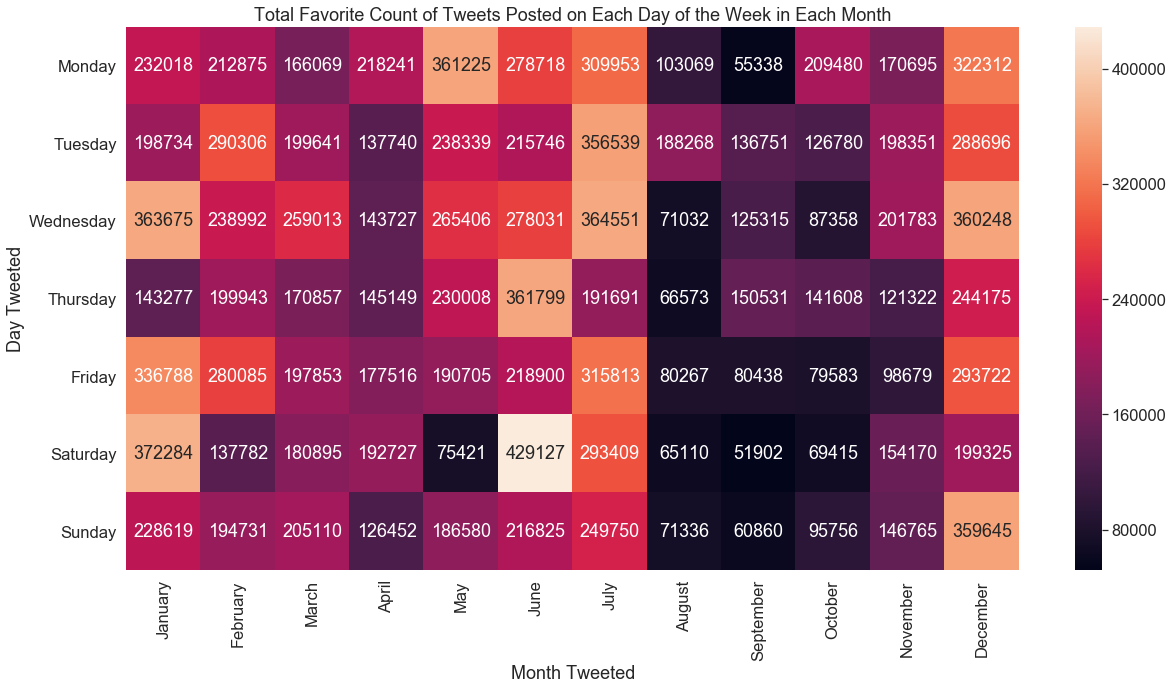

In [78]:
#Plot the sum of favorite count in each day of the week in each month with a heat map
plt.figure(figsize=[20, 10])
sns.heatmap(day_month_pivot, annot=True, fmt="d");
plt.xlabel('Month Tweeted')
plt.ylabel('Day Tweeted')
plt.title('Total Favorite Count of Tweets Posted on Each Day of the Week in Each Month');